<a href="https://colab.research.google.com/github/Radha-12/AI_ML/blob/main/UnSupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **UnSupervised Learning Project**



**▶ PART - A**

**1. Data Understanding**

In [ ]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# To read 1 CSV file and 1 json file as DataFrame and store them into 2 separate variables.
dfC1 = pd.read_csv('/content/drive/MyDrive/AI /Dec AI/Project - UnSupervised Learning /Part1+-+Car+name.csv')
dfC2 = pd.read_json('/content/drive/MyDrive/AI /Dec AI/Project - UnSupervised Learning /Part1+-+Car-Attributes.json')

In [ ]:
# To get the shapes of 2 dataframes
print(dfC1.shape)
print(dfC2.shape)

(398, 1)
(398, 8)


*   dfC1 having 398 instances with single feature.
*   dfC2 having 398 instances with 8 features.



In [ ]:
dfC1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


*  There are no null values that need to be treated.
*  Feature having Object value be car_name.
*  We have 398 instances and 1 column with memory usage is 3.2+ kB.

In [ ]:
dfC2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


*  There are no null values that need to be treated.
*  Features having Object value be hp.
*  Features having int values are cyl, wt, yr and origin.
*  Features having float values are mpg, disp and acc.
*  We have 398 instances and 8 columns with memory usage is 25.0+ kB.

**2. Data Preparation and Exploration**

In [ ]:
# Creating copy of the dataframe
df1=dfC1.copy(deep = True)
df2=dfC2.copy(deep = True)

In [ ]:
# To merge two dataframes into a single dataframe
df = [df1,df2]
df = pd.concat(df,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


*  There are no null values that need to be treated.
*  Features having Object values are car_name and hp.
*  Features having int values are cyl, wt, yr and origin.
*  Features having float values are mpg, disp and acc.
*  We have 398 instances and 9 columns with memory usage is 28.1+ kB.

In [ ]:
df.head() # To get the first 5 rows of the dataframe

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
# To check 5-point summary of the new dataframe i.e 'df'
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# Print Feature-wise percentage of Null values
df.isna().sum()/len(df)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

Found there are no missing values in all the features/columns

In [ ]:
# To check the duplicate values
df.duplicated().sum()

0

Found there are no duplicate values in all the features/columns

In [ ]:
df.origin.value_counts() # To get the value count of Origin feature

1    249
3     79
2     70
Name: origin, dtype: int64

Found 249 instances as 1, 79 instances as 3 and 70 instances as 2

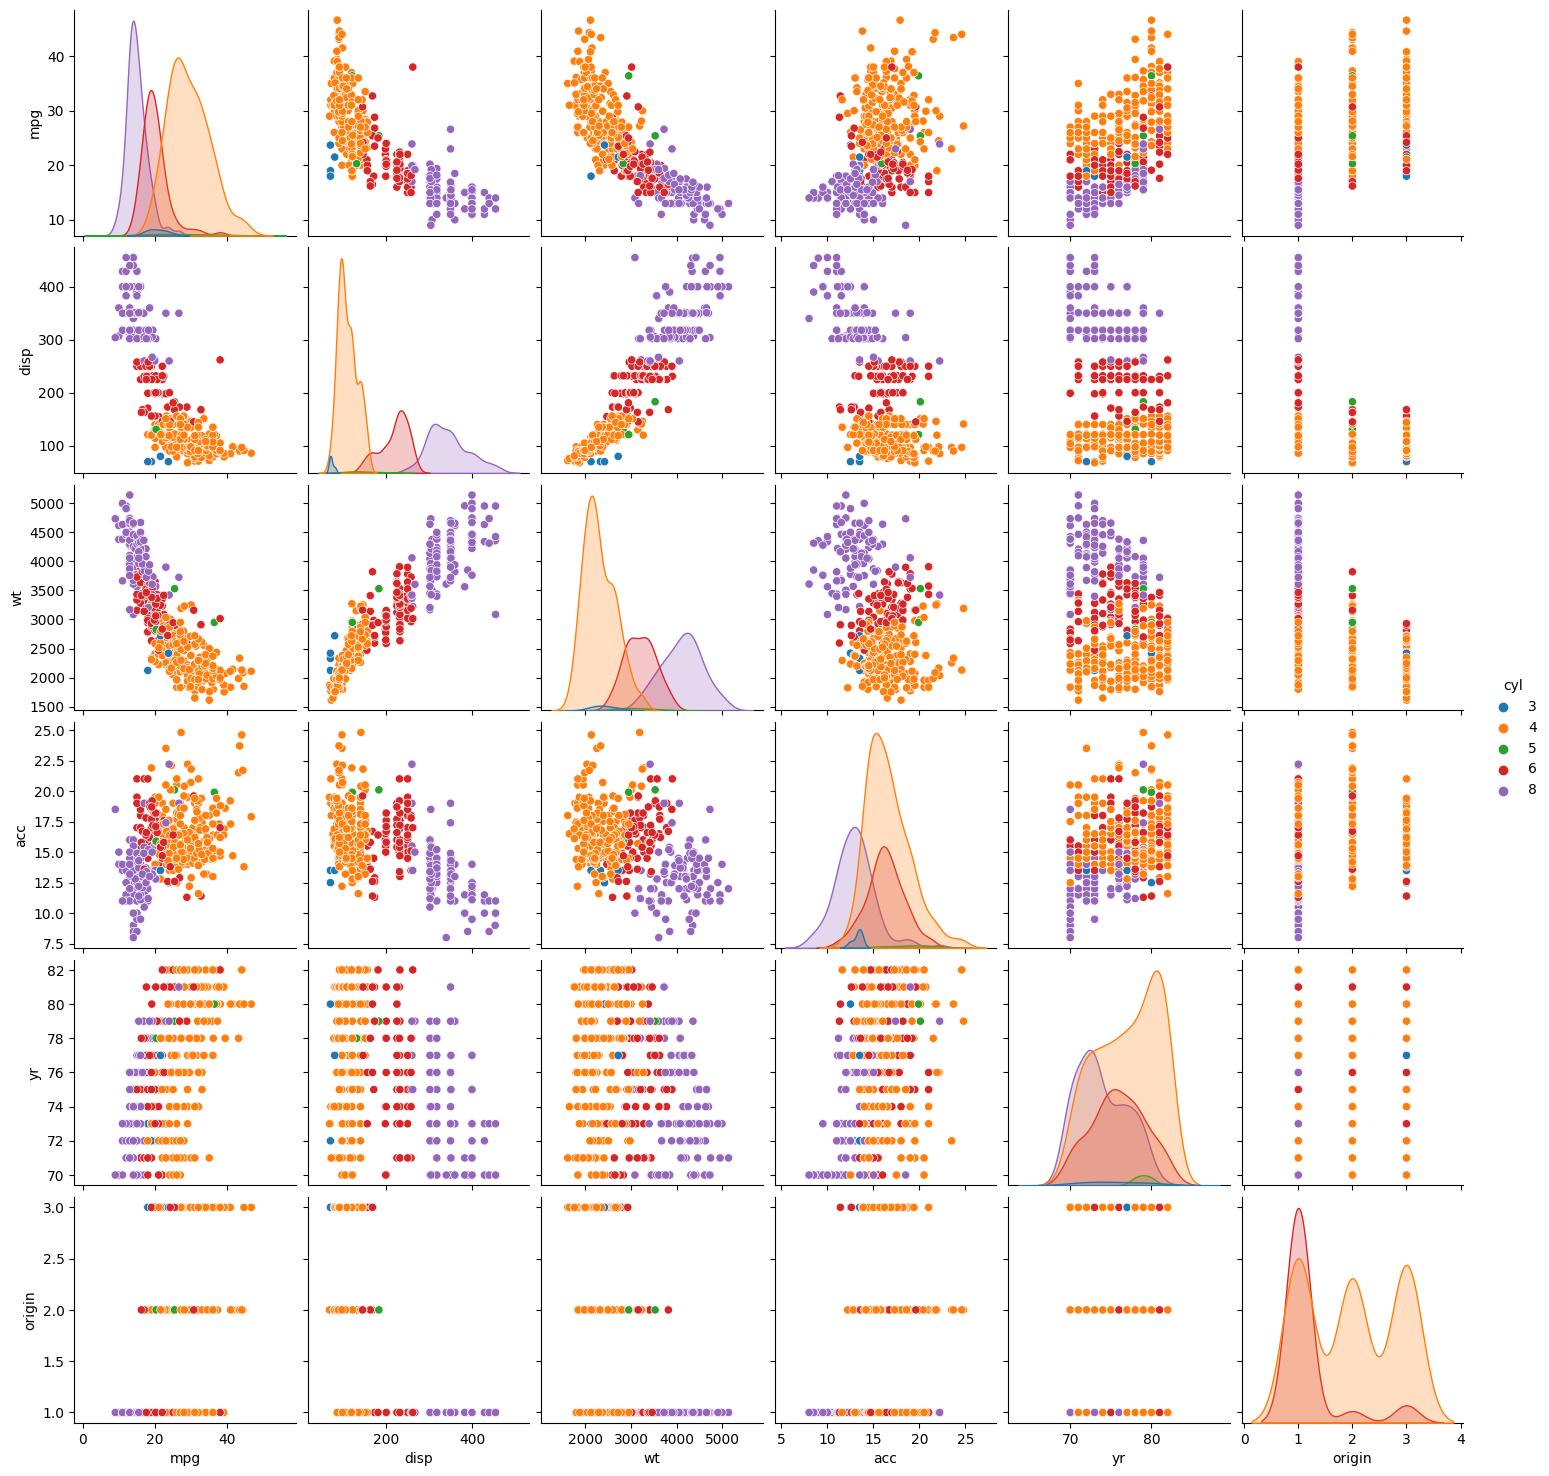

In [ ]:
# To visualize the pairplot distinguished by colors
sns.pairplot(df,hue='cyl',palette='tab10')

<Axes: xlabel='wt', ylabel='disp'>

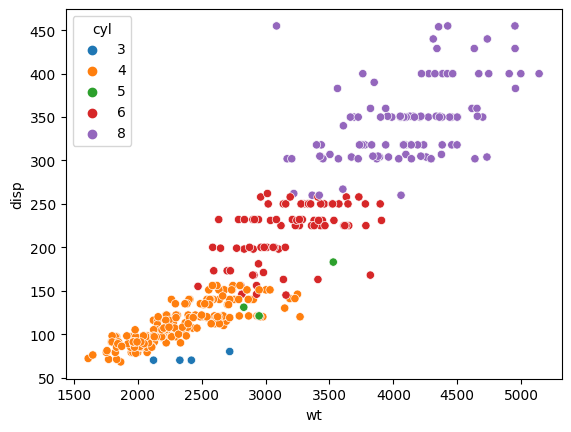

In [ ]:
# To visualize the scatterplot distinguished by colors
sns.scatterplot(data=df,x ='wt',y ='disp',hue=df['cyl'],palette='tab10')

**Observations:**

*   'wt' is having positive linear relationship with cylinder displacement.
*   'wt' and cylinder displacement is increasing along with increase in Number of Cylinders.
*   There are more vehicles with 4 cylinders and 8 cylinders than 3,5 & 6






<Axes: xlabel='wt', ylabel='mpg'>

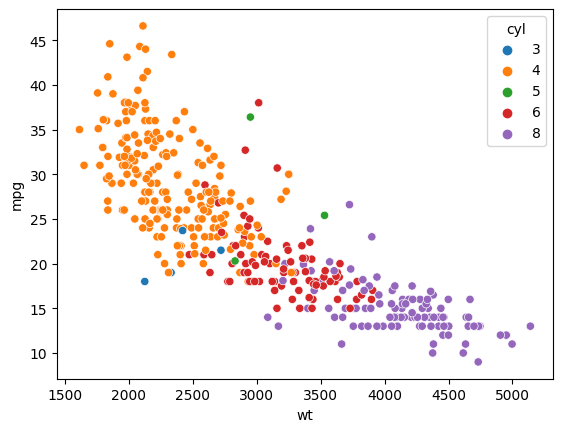

In [ ]:
# To visualize the scatterplot distinguished by colors
sns.scatterplot(data=df,x ='wt',y ='mpg',hue=df['cyl'],palette='tab10')

**Observations:**

*   'wt' is having negative linear relationship with Miles Per Gallon.
*   Miles Per Gallon decreases with increase in wt.
*   Miles Per Gallon reduces with increased number of cylinders.




In [ ]:
# To check unexpected values in 'hp' feature
for i in df['hp']:
    if not str(i).isdigit():
        print(i)

?
?
?
?
?
?


*   Found 6 unxpected values i.e '?' in the 'hp' feature.


In [ ]:
df['hp'] = np.where(df['hp']=='?',np.nan,df['hp']) # To impute the values

In [ ]:
df.isna().sum() # To check no.of null values present for each feature

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

Found 6 null values in 'hp' feature

In [ ]:
df.dropna(inplace=True) # To drop the null values

In [ ]:
# To change the datatypes of the following features: ‘hp’ to 'float64' as it is a continuous feature

df['hp'] = df['hp'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    float64
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


*  There are no null values that need to be treated.
*  Features having Object values are car_name.
*  Features having int values are cyl, wt, yr and origin.
*  Features having float values are mpg, disp, hp and acc.
*  We have 392 instances and 9 columns with memory usage is 30.6+ kB.

In [ ]:
df.hp.value_counts() # To count the values for 'hp' feature

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: hp, Length: 93, dtype: int64

In [ ]:
X = df.drop('car_name', axis=1) # To drop the car_name feature

In [ ]:
X.head() # To get first five rows of the dataframe

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [ ]:
# To Standardize/Normalise the data
from scipy.stats import zscore

XScaled = X.apply(zscore)

**Using K-Means Clustering:**

3136.0000000000005


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1557.7707588149383
1170.3077985494647
968.169407462605
815.2102262928402
739.0989540072497
670.1478474320854
625.6143516193438
580.9335797962194


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

546.1741155781808


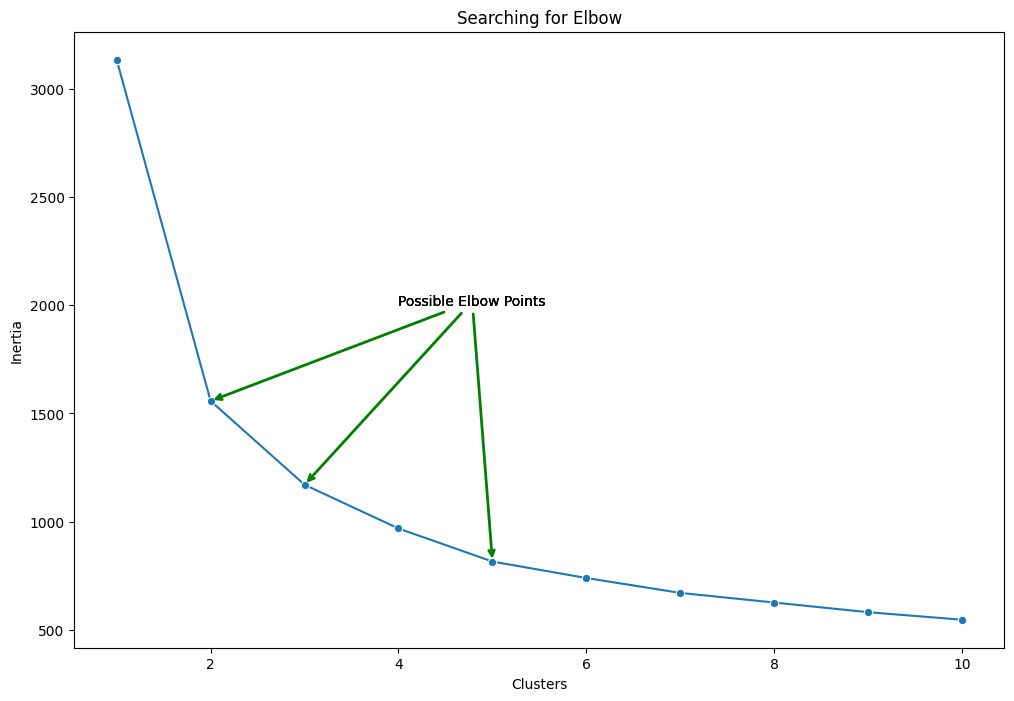

In [ ]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(XScaled)  # To fit the model
    clusters.append(km.inertia_)  # To append the inertia(i.e which measures how well a dataset was clustered by K-Means)
    print(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax,marker='o')
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotating arrows
ax.annotate('Possible Elbow Points', xy=(2,1557.7707588149383), xytext=(4, 2000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green', lw=2))

ax.annotate('Possible Elbow Points', xy=(5,815.2102262928402), xytext=(4, 2000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green', lw=2))

ax.annotate('Possible Elbow Points', xy=(3,1170.3077985494647), xytext=(4, 2000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green', lw=2))

plt.show() # To display the plot

*   Found possible elbow points at k= 2, 3 & 5 from the above plot.
*   Hence, Need to apply the PCA model for these posible elbow points.
   





**A) For k=3, KMeans with 3 clusters:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


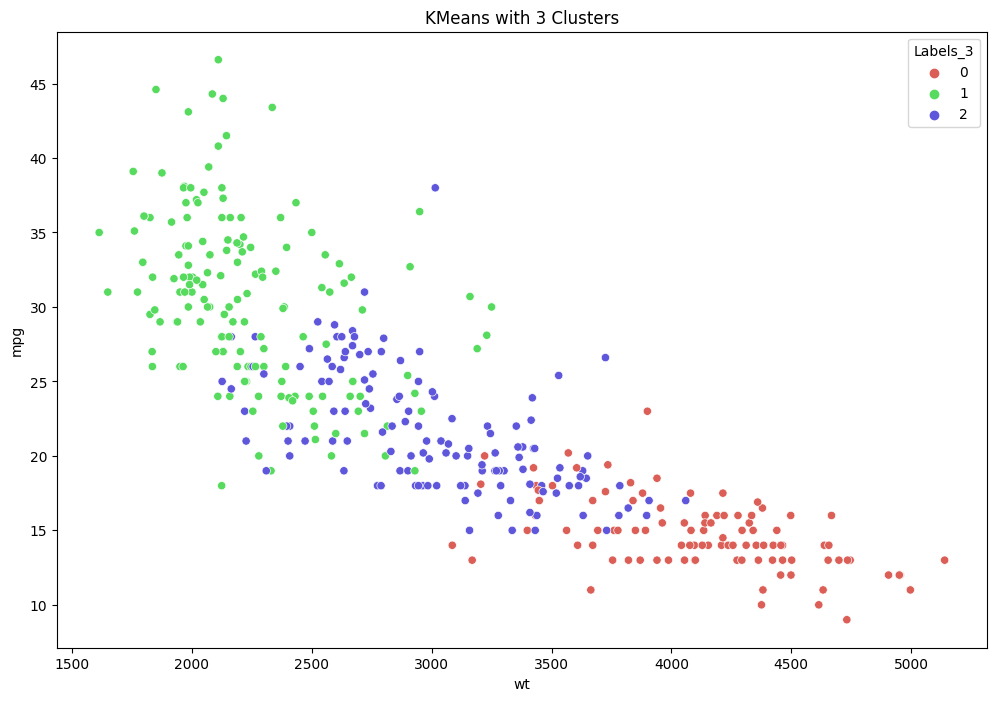

In [ ]:
km3 = KMeans(n_clusters=3).fit(XScaled)

df['Labels_3'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x = 'wt',y = 'mpg', hue=df['Labels_3'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

**Observations:**

*   'wt' is having negative linear relationship with Miles Per Gallon.
*   Miles Per Gallon decreases with increase in wt.


<Axes: xlabel='wt', ylabel='mpg'>

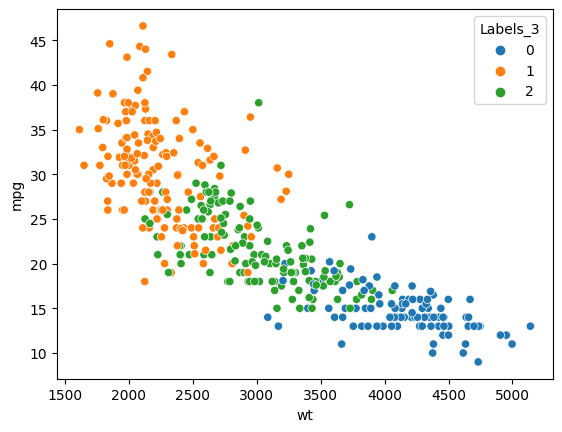

In [ ]:
sns.scatterplot(data=df,x='wt',y='mpg',hue='Labels_3',palette='tab10')

**Observations:**

*   'wt' is having negative linear relationship with Miles Per Gallon.
*   Miles Per Gallon decreases with increase in wt.


<Axes: xlabel='wt', ylabel='hp'>

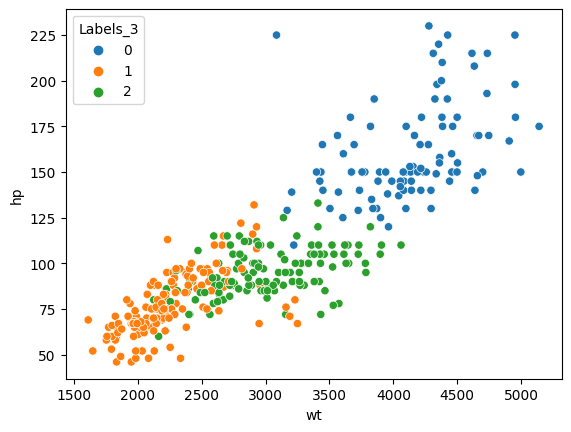

In [ ]:
sns.scatterplot(data=df,x='wt',y='hp',hue='Labels_3',palette='tab10')

**Observations:**

*   'wt' is having positive linear relationship with 'hp'.
*   'hp' increases with increase in wt.


In [ ]:
df.head() # To get the first five rows of the dataframe

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Labels_3
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,0


*   Found Label_3 column is added to the actual dataset i.e before dimensionality reduction.






**B) For k=5, KMeans with 5 clusters:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


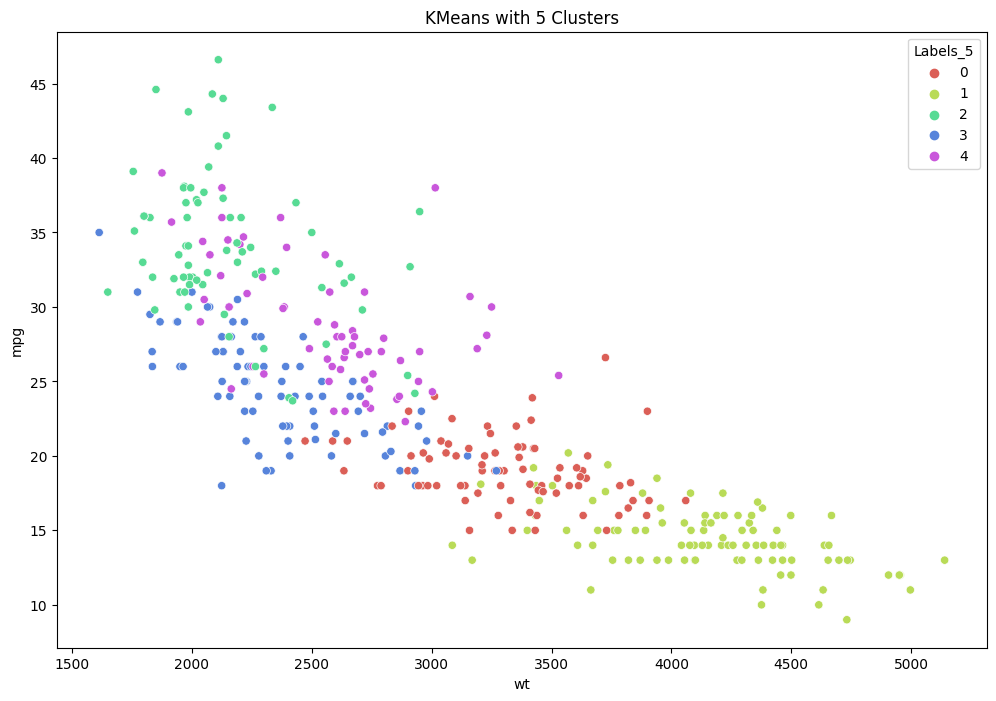

In [ ]:
km5 = KMeans(n_clusters=5).fit(XScaled)

df['Labels_5'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x = 'wt',y = 'mpg', hue=df['Labels_5'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

**Observations:**

*   'wt' is having negative linear relationship with Miles Per Gallon.
*   Miles Per Gallon decreases with increase in wt.


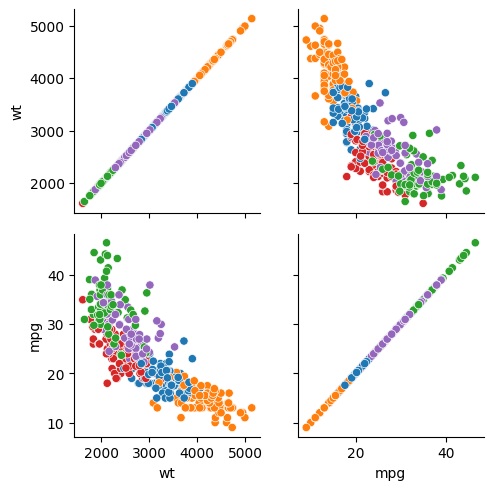

In [ ]:
g = sns.PairGrid(df, vars=["wt", "mpg"], hue="Labels_5",palette='tab10',)
g.map(sns.scatterplot)

<Axes: xlabel='wt', ylabel='mpg'>

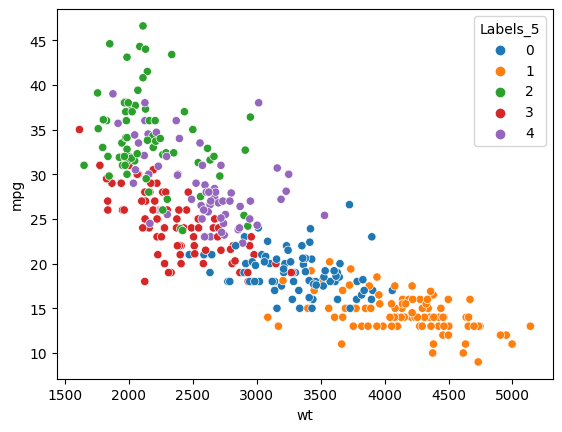

In [ ]:
sns.scatterplot(data=df,x='wt',y='mpg',hue='Labels_5',palette='tab10')

**Observations:**

*   'wt' is having negative linear relationship with Miles Per Gallon.
*   Miles Per Gallon decreases with increase in wt.


<Axes: xlabel='wt', ylabel='hp'>

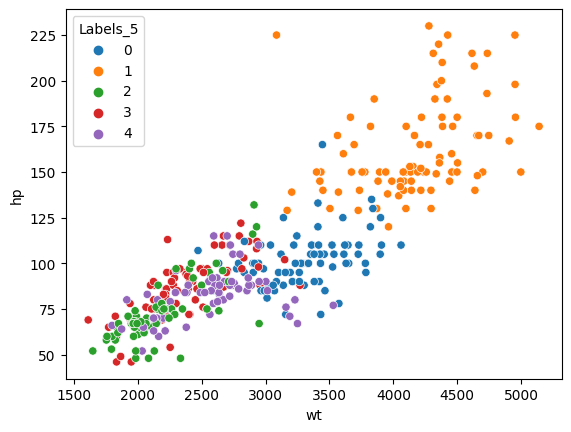

In [ ]:
sns.scatterplot(data=df,x='wt',y='hp',hue='Labels_5',palette='tab10')

**Observations:**

*   'wt' is having positive linear relationship with 'hp'.
*   'hp' increases with increase in wt.


In [ ]:
df.head() #To get the first five rows of the dataframe

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Labels_3,Labels_5
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,0,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,0,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,0,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,0,1


*   Found Label_5 column along with the Label_3 column is added to the actual dataset i.e before dimensionality reduction.

**Predicting the Cluster in which values on changing 'disp' to 320.0 and 'hp' to 170.0 falls under:**

**A) For k=3, KMeans with 3 clusters:**

In [ ]:
km3.predict([[18.0,8,320,170.0,3504,12.0,70,1]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0

**B) For k=5, KMeans with 5 clusters:**

In [ ]:
km5.predict([[18.0,8,320,170.0,3504,12.0,70,1]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


1

**▶ PART - B**

**1.Data Understanding & Cleaning:**

In [ ]:
# Import neccessary libraries

from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
# To read 1 CSV file as DataFrame and store that into a separate variable.
df_veh = pd.read_csv('/content/drive/MyDrive/AI /Dec AI/Project - UnSupervised Learning /vehicle.csv')

In [ ]:
df_veh.head() # To get the first five rows of the dataframe

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [ ]:
df_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

*  There are few null values that are need to be treated.
*  Features having Object values are class.
*  Features having int values are compactness, max.length_aspect_ratio and hollows_ratio.
*  Features having float values are circularity, distance_circularity,
 pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr,axis_rectangularity,scaled_variance, scaled_variance.1, scaled_radius_of_gyration,scaled_of_gyration.1, skewness_about,skewness_about.1, skewness_about.2.
*  We have 846 instances and 19 columns with memory usage is 125.7+ kB.

In [ ]:
# To Print Feature-wise percentage of Null values
df_veh.isna().sum()/len(df)*100

compactness                    0.000000
circularity                    1.275510
distance_circularity           1.020408
radius_ratio                   1.530612
pr.axis_aspect_ratio           0.510204
max.length_aspect_ratio        0.000000
scatter_ratio                  0.255102
elongatedness                  0.255102
pr.axis_rectangularity         0.765306
max.length_rectangularity      0.000000
scaled_variance                0.765306
scaled_variance.1              0.510204
scaled_radius_of_gyration      0.510204
scaled_radius_of_gyration.1    1.020408
skewness_about                 1.530612
skewness_about.1               0.255102
skewness_about.2               0.255102
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

*   Found null values in circularity, distance_circularity, radius_ratio,
pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2 features.
*   Hence, need to drop those values as they are lessthan 5%.






In [ ]:
# Creating copy of the dataframe
df=df_veh.copy(deep = True)

In [ ]:
df.dropna(inplace=True) #To drop the null values

In [ ]:
# To Print Feature-wise percentage of Null values
df.isna().sum()/len(df)*100

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

Found there are no null values in all the features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

*  There are no null values that need to be treated.
*  Features having Object values are class.
*  Features having int values are compactness, max.length_aspect_ratio and hollows_ratio.
*  Features having float values are circularity, distance_circularity,
 pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr,axis_rectangularity,scaled_variance, scaled_variance.1, scaled_radius_of_gyration,scaled_of_gyration.1, skewness_about,skewness_about.1, skewness_about.2.
*  We have 813 instances and 19 columns with memory usage is 127.0+ kB.

<Axes: ylabel='class'>

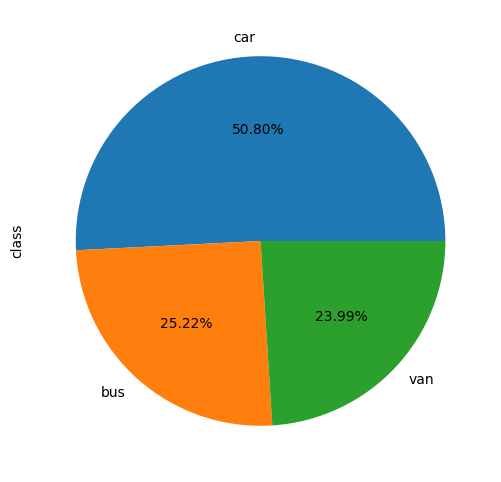

In [ ]:
# To visualize a Pie-chart and print percentage of values for variable ‘class’
df['class'].value_counts().plot(kind='pie',figsize=(11, 6),autopct='%1.2f%%',)

For 'class' feature, found unique value as 'Car' with 50.80% , unique value as 'bus' with 25.22% and unique value as 'van' with 23.99% from the given data.



In [ ]:
# To check for duplicate rows in the data
df.duplicated().sum()

0

Found there are no duplicate values

**2.Data Preparation:**

In [ ]:
# To Split the data into Train and Test

X = df.drop('class', axis =1) # To drop the 'class' column
Y = df['class']


In [ ]:
# To Normalise/Standarize the values using Standard Scaler

Sc = StandardScaler()
XScaled = Sc.fit_transform(X)

In [ ]:
# Train a base Classification model using SVM
svm = SVC()
svm.fit(XScaled, Y) # To fit the classifier model
pred_X = svm.predict(XScaled) # To get the predicted values for XScaled values of the svm model
print(classification_report(pred_X,Y)) # To print classication metrics report


              precision    recall  f1-score   support

         bus       0.99      0.99      0.99       205
         car       0.98      0.99      0.99       409
         van       0.97      0.95      0.96       199

    accuracy                           0.98       813
   macro avg       0.98      0.98      0.98       813
weighted avg       0.98      0.98      0.98       813



*   Achieved 98% of accuracy with actual dataset values.



In [ ]:
# To use the PCA model with 10 components(n)
pca=PCA(n_components=10)
pca_data=pca.fit_transform(XScaled) # To fit the model

In [ ]:
# To calculate the percentage of variation explained by each eigen vector
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
print(percentage_var_explained)

[0.53042099 0.16774481 0.10759969 0.0656542  0.05213065 0.02985964
 0.0201473  0.01247646 0.00875824 0.005208  ]


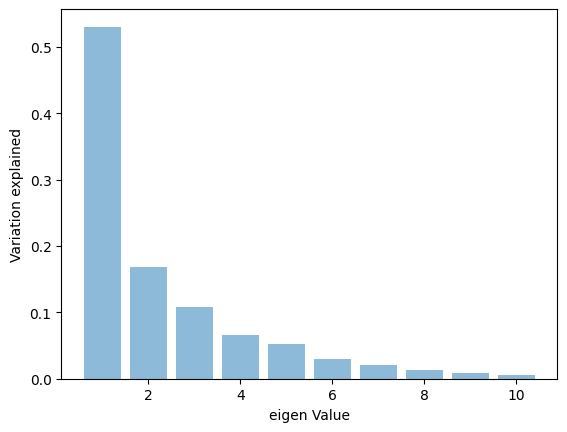

In [ ]:
# To visualize the variation explained by each eigen vector
plt.bar(list(range(1,11)),percentage_var_explained,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

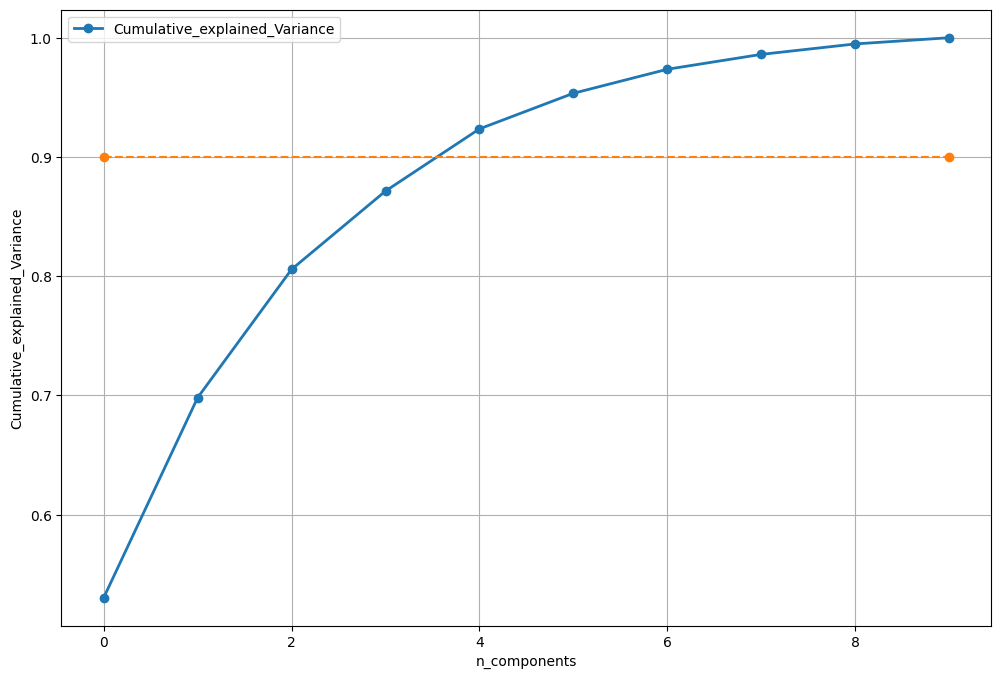

In [ ]:
# To calculate the percentage of cumulative Variance explained by each eigen vector
cum_var_explained=np.cumsum(percentage_var_explained)
# To Visualize Cumulative Variance explained with Number of Components
plt.figure(1,figsize=(12,8))
plt.clf()
plt.plot(cum_var_explained,linewidth=2,marker='o')
plt.plot((0,9),(0.9,0.9),'--',marker='o')  # To highlight the threshold of 90% as a horizontal line
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_Variance')
plt.legend(['Cumulative_explained_Variance'], loc = "best")
plt.show()

**Observations:**
* Found minimum components as 4 from the above plot.   
* Hence, can achieve better model performance.



**For Minimum Components, n=4 need to use PCA Model**

In [ ]:
# To use the PCA model with 4 components(n)
pca_4=PCA(n_components=4)
pca_4.fit(XScaled) # To fit the model

PCA(n_components=4)

In [ ]:
# To calculate the percentage of variation explained by each eigen vector
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
print(percentage_var_explained)

[0.53042099 0.16774481 0.10759969 0.0656542  0.05213065 0.02985964
 0.0201473  0.01247646 0.00875824 0.005208  ]


In [ ]:
# To get the predicted X features values for n=4

Xpca4 = pca_4.transform(XScaled)

In [ ]:
# Train a base Classification model using SVM
svm = SVC()
svm.fit(Xpca4,Y) # To fit the svm model
pred_test = svm.predict(Xpca4)# To get the predicted value for Xpca4 values of the svm model
print(classification_report(pred_test,Y))

              precision    recall  f1-score   support

         bus       0.66      0.85      0.75       160
         car       0.88      0.85      0.86       428
         van       0.76      0.66      0.71       225

    accuracy                           0.80       813
   macro avg       0.77      0.79      0.77       813
weighted avg       0.80      0.80      0.80       813



*   Achieved 80% accuracy with minimum n_components as 4. Hence, need to tune the svm model using Grid search for better performance.




**4.Performance Improvement:**

**Using GridSearch to tune the svm model-**

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(XScaled, Y) # To fit the model

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
clf.get_params # To get the parameters

<bound method BaseEstimator.get_params of GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})>

In [ ]:
pred_grid = clf.predict(XScaled) # To get the predicted XScaled Values

In [ ]:
print(classification_report(Y,pred_grid)) # To print the classification metrics of the data

              precision    recall  f1-score   support

         bus       1.00      0.99      0.99       205
         car       1.00      1.00      1.00       413
         van       0.98      0.99      0.99       195

    accuracy                           0.99       813
   macro avg       0.99      0.99      0.99       813
weighted avg       0.99      0.99      0.99       813



*   Achieved 99% accuracy on tuning the svm model (i.e with minimum n_components=4).
*   Accuracy improved by 19% on tuning the svm model.
*   Precision, Recall and F1-Score improved by +1 - +5%.



**5.Data Understanding & Cleaning:**

**A.Pre-requisite/assumptions of PCA**


*   Number of features in the dataset are high and need to reduce number of
dimensions.
*   Multicollinearity exist between the existing features in the Dataset(If the features are not correlated, PCA will be unable to determine principal components.).
*   Linear relationship between the features(This algorithm is not suited to capturing non-linear relationships. Need to transform the non-linear features or relationships between features into linear, using the standard methods such as log transforms.).







**B. Advantages and limitations of PCA**

**Advantages:**

*   Dimensionality Reduction(To lower the dimensions of the training dataset, we prevent the predictive algorithms from overfitting).
*   Noise Reduction.
*   Feature Selection.
*   Removes Correlated features (i.e multicollinearity).
*   Computational time will be reduced(i.e speeds up the machine algorithm coverage when trained on principal components than the original dataset.).   
*   Avoids overfitting. Hence, will gain better model performance.


**Limitations:**

*   Loss of interpretability(Principal components are linear combinations of the features from the original data, but they are not as easy to interpret. For example, it is difficult to tell which are the most important features in the dataset after computing principal components.).
*   Sensitive to the scale of the features(Imagine we have two features - one takes 'age' values between 27 and 40, while the other 'salary' takes values between 30,000 and 2,50,000. PCA will be more biased towards the second feature i.e 'salary' being the first principle component, regardless of the actual maximum variance within the data. Hence need to standardize the values first).
*   Not robust against outliers(The algorithm will be biased in datasets with strong outliers.Hence, need to remove those before performing PCA).




